In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
folder_path = 'closest_points'

window_lengths = {
    'cluster_0_closest_points.csv': 70,
    'cluster_1_closest_points.csv': 12,
    'cluster_2_closest_points.csv': 20,
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


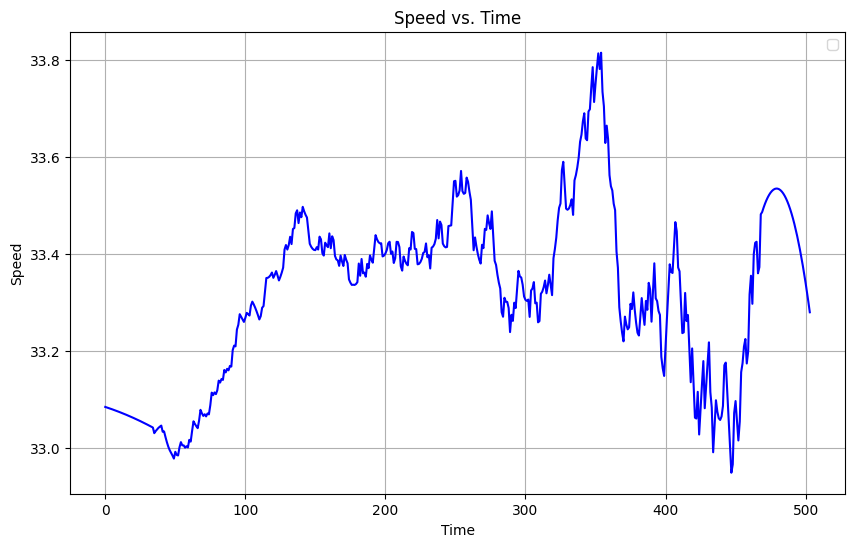

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


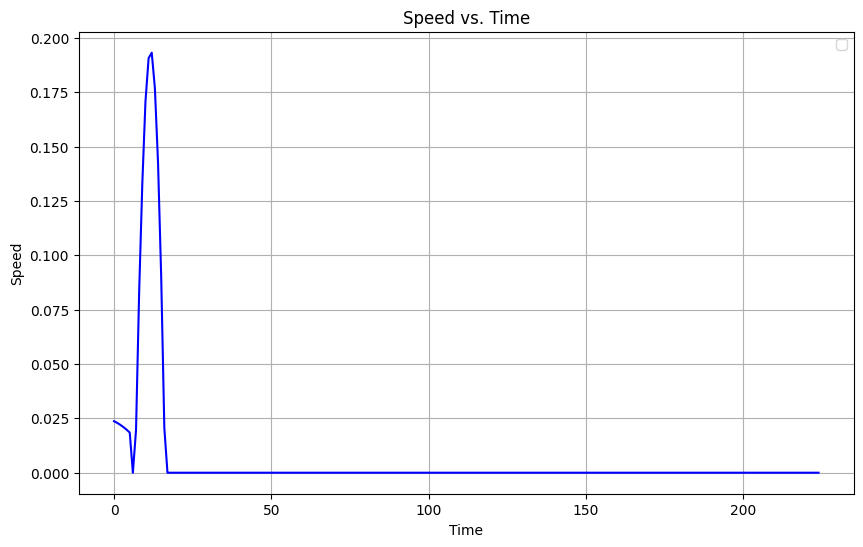

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


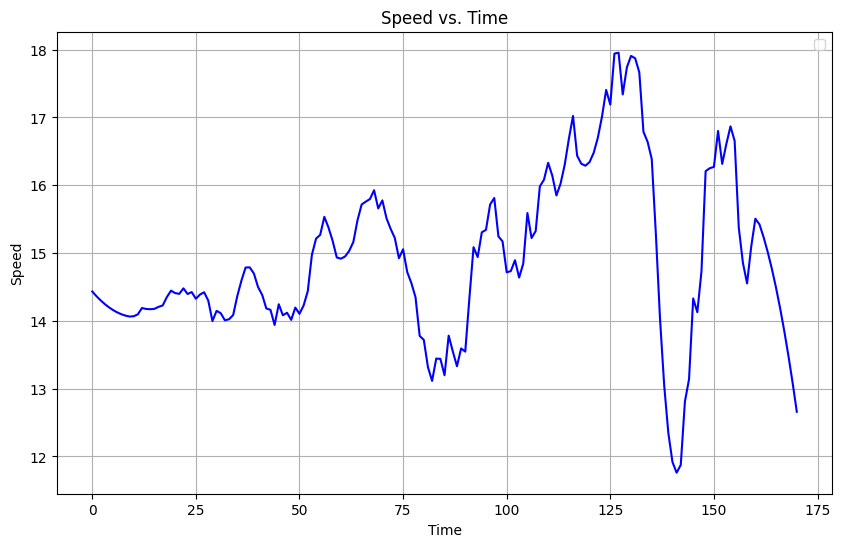

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


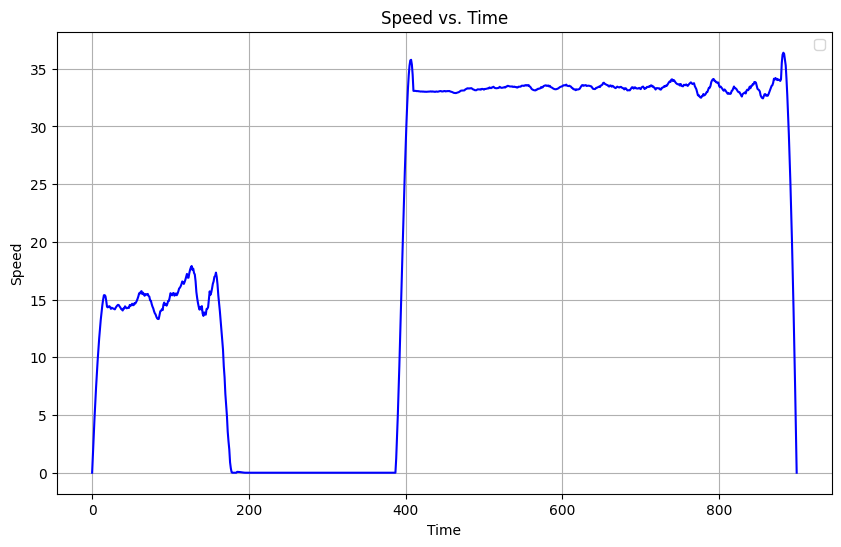

In [15]:
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path)

    avg_speed = data['avg speed'].values

    window_length = window_lengths.get(csv_file, 30)

    smoothed_avg_speed = savgol_filter(avg_speed, window_length=window_length, polyorder=2)

    smoothed_avg_speed = np.maximum(smoothed_avg_speed, 0)

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(data)), smoothed_avg_speed, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.title(f'Speed vs. Time')
    plt.legend()
    plt.grid(True)
    plt.show()